## Application des transformations definies dans "trasnfromers.py"

In [1]:
from transformers import *

In [2]:
import pandas as pd
from abc import ABC, abstractmethod
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from pathlib import Path
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import pickle


In [ ]:
columns_to_drop = [
        "piezo_station_department_name",
        "piezo_station_update_date",
        "piezo_station_commune_code_insee",
        "piezo_station_pe_label",
        "piezo_station_bdlisa_codes",
        "piezo_station_bss_code",
        "piezo_station_bss_id", 
        "piezo_bss_code",
        "piezo_measurement_date",
        "piezo_producer_name",
        "piezo_measure_nature_code",
        "meteo_name",
        "meteo_id", 
        "meteo_latitude",
        "meteo_longitude",
        "hydro_station_code",
        "hydro_method_code", 
        "hydro_method_label", 
        "hydro_qualification_label", 
        "prelev_structure_code_0",
        "prelev_structure_code_2",
        "prelev_structure_code_0",
        "prelev_commune_code_insee_0",
        "piezo_station_department_code",
        
        "meteo_DRR", 
        "meteo_temperature_min_ground", 
        "meteo_temperature_min_50cm", 
        "meteo_pressure_avg",
        "meteo_pression_maxi", 
        "meteo_wind_speed_avg_2m", 
        "meteo_wind_max_2m", 
        "meteo_wind_direction_max_inst_2m", 
        "meteo_time_wind_max_2m", 
        "meteo_wetting_duration", 
        "meteo_sunshine_duration", 
        "meteo_radiation", 
        "meteo_radiation_direct", 
        "meteo_sunshine_%", 
        "meteo_radiation_IR", 
        "meteo_radiation_UV_max", 
        "meteo_cloudiness", 
        "meteo_cloudiness_height", 
        "meteo_if_snow", 
        "meteo_if_fog", 
        "meteo_if_thunderstorm", 
        "meteo_if_sleet", 
        "meteo_if_hail", 
        "meteo_if_dew", 
        "meteo_if_black_ice", 
        "meteo_if_snow_ground", 
        "meteo_if_frost", 
        "meteo_if_smoke", 
        "meteo_if_mist",
        "meteo_if_lightning", 
        "meteo_evapotranspiration_Monteith", 
        "meteo_radiation_UV", 
        "meteo_snow_height", 
        "meteo_snow_thickness_max", 
        "meteo_snow_thickness_6h"]



In [4]:
# Specification des colonnes  a garder 

##ANCIENNE VERSION
#all_columns = pd.read_csv(path_src_dataset, nrows=0).columns.tolist()
#columns_to_keep = [col for col in all_columns if col not in columns_to_drop] 


##NOUVELLE VERSION 
#Je précise ci dessous les colonnes nécessaires pour chacun des transformers, et en commentaire l'ordre dans lequel ce transformer sera utilisé
#Date
col_yass = ['meteo_date'] + ['prelev_volume_0', 'prelev_volume_1',
                             'prelev_volume_2', 'prelev_other_volume_sum','piezo_station_commune_name']  # ORDRE = 4 (en dernier car il supprime les dates )
#Altitude
altitude_flo = ["piezo_station_altitude", "meteo_altitude"] # ORDRE 1
prelev_flo = ["prelev_volume_0", "prelev_usage_label_0", "prelev_volume_obtention_mode_label_0", "prelev_volume_1", "prelev_usage_label_1", "prelev_volume_obtention_mode_label_1", "prelev_volume_2", "prelev_usage_label_2", "prelev_volume_obtention_mode_label_2"]
meteo_time_flo = ["meteo_time_tx", "meteo_time_tn"]
col_flo = altitude_flo + prelev_flo + meteo_time_flo
#Insee & rain "CleanFeatures"
cols_yael_input = ['insee_%_agri', 'meteo_rain_height', 'insee_pop_commune', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const']
cols_yael_need = ["piezo_station_department_code", "meteo_date"]

#Temperature
cols_lucien_need = ['piezo_station_department_code', 'piezo_measurement_date']
cols_lucien_input = ['meteo_temperature_avg','meteo_temperature_min','meteo__pressure_saturation_avg','meteo_temperature_max']
#Lat Long
cols_mat = ["distance_piezo_meteo",'piezo_station_longitude','piezo_station_latitude','meteo_latitude','meteo_longitude', "meteo_temperature_avg", "meteo_temperature_avg_threshold", "meteo_temperature_min", "meteo_temperature_max", "meteo_temperature_min_ground", "hydro_observation_result_elab", "hydro_status_code", "hydro_qualification_code", "hydro_hydro_quantity_elab"]


#Clean pizo
pizo_cols = ['piezo_station_investigation_depth', 'piezo_obtention_mode', 'piezo_status', 'piezo_qualification', 'piezo_measure_nature_code','piezo_station_department_code']
 
#target
target = "piezo_groundwater_level_category"

columns_to_keep = col_yass + cols_yael_input + cols_yael_need + col_flo + cols_lucien_need + cols_lucien_input + cols_mat + [target] + pizo_cols

print(len(columns_to_keep))
columns_to_keep

54


['meteo_date',
 'prelev_volume_0',
 'prelev_volume_1',
 'prelev_volume_2',
 'prelev_other_volume_sum',
 'piezo_station_commune_name',
 'insee_%_agri',
 'meteo_rain_height',
 'insee_pop_commune',
 'insee_med_living_level',
 'insee_%_ind',
 'insee_%_const',
 'piezo_station_department_code',
 'meteo_date',
 'piezo_station_altitude',
 'meteo_altitude',
 'prelev_volume_0',
 'prelev_usage_label_0',
 'prelev_volume_obtention_mode_label_0',
 'prelev_volume_1',
 'prelev_usage_label_1',
 'prelev_volume_obtention_mode_label_1',
 'prelev_volume_2',
 'prelev_usage_label_2',
 'prelev_volume_obtention_mode_label_2',
 'meteo_time_tx',
 'meteo_time_tn',
 'piezo_station_department_code',
 'piezo_measurement_date',
 'meteo_temperature_avg',
 'meteo_temperature_min',
 'meteo__pressure_saturation_avg',
 'meteo_temperature_max',
 'distance_piezo_meteo',
 'piezo_station_longitude',
 'piezo_station_latitude',
 'meteo_latitude',
 'meteo_longitude',
 'meteo_temperature_avg',
 'meteo_temperature_avg_threshold',


In [ ]:
path_src_dataset = Path("./data/src/X_train_Hi5.csv")


# Out folders
out_folder_dataset = Path("./data/cleaned")
out_folder_dataset.mkdir(parents=True, exist_ok=True) # Create the folder if it doesn't exist
out_folder_config = Path("./data/processed/pipelines")
out_folder_config.mkdir(parents=True, exist_ok=True)

# Load the CSV file with only the relevant columns
df = pd.read_csv(path_src_dataset, usecols=columns_to_keep) #,nrows=10e4) #  SI on veut charger moins de lignes : ajouter --> ,nrows=10e4)
df = df.drop_duplicates()


#Mapping du target 
mapping = {'Very Low': 0, 'Low': 1, 'Average': 2, 'High': 3, 'Very High': 4}
df[target] = df[target].map(mapping)

C:\Users\fmore\AppData\Local\Temp\ipykernel_33952\2488399023.py:11: DtypeWarning: Columns (110,111,117,118,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_src_dataset, usecols=columns_to_keep) #  SI on veut charger moins de lignes : ajouter --> ,nrows=10e4)


In [6]:

#Test-val split
def summer_train_test_split(df: pd.DataFrame, perc_val: float):
    df_copy = df.copy()

    df_copy["meteo_date"] = pd.to_datetime(df_copy["meteo_date"], format="%Y-%m-%d")

    summer_df = df_copy[(df_copy["meteo_date"].dt.month >= 6) & (df_copy["meteo_date"].dt.month <= 9)]

    _, summer_val = train_test_split(summer_df, random_state=42, test_size=perc_val, shuffle=True)

    Xy_train = df.drop(index=summer_val.index).sample(frac=1, random_state=42)
    Xy_val: pd.DataFrame = df.iloc[summer_val.index].sample(frac=1, random_state=42)

    X_train = Xy_train.drop(columns=[target])
    y_train = Xy_train[target]

    X_val = Xy_val.drop(columns=[target])
    y_val = Xy_val[target]

    del df_copy

    return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = summer_train_test_split(df, 0.5)

ValueError: With n_samples=0, test_size=0.5 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

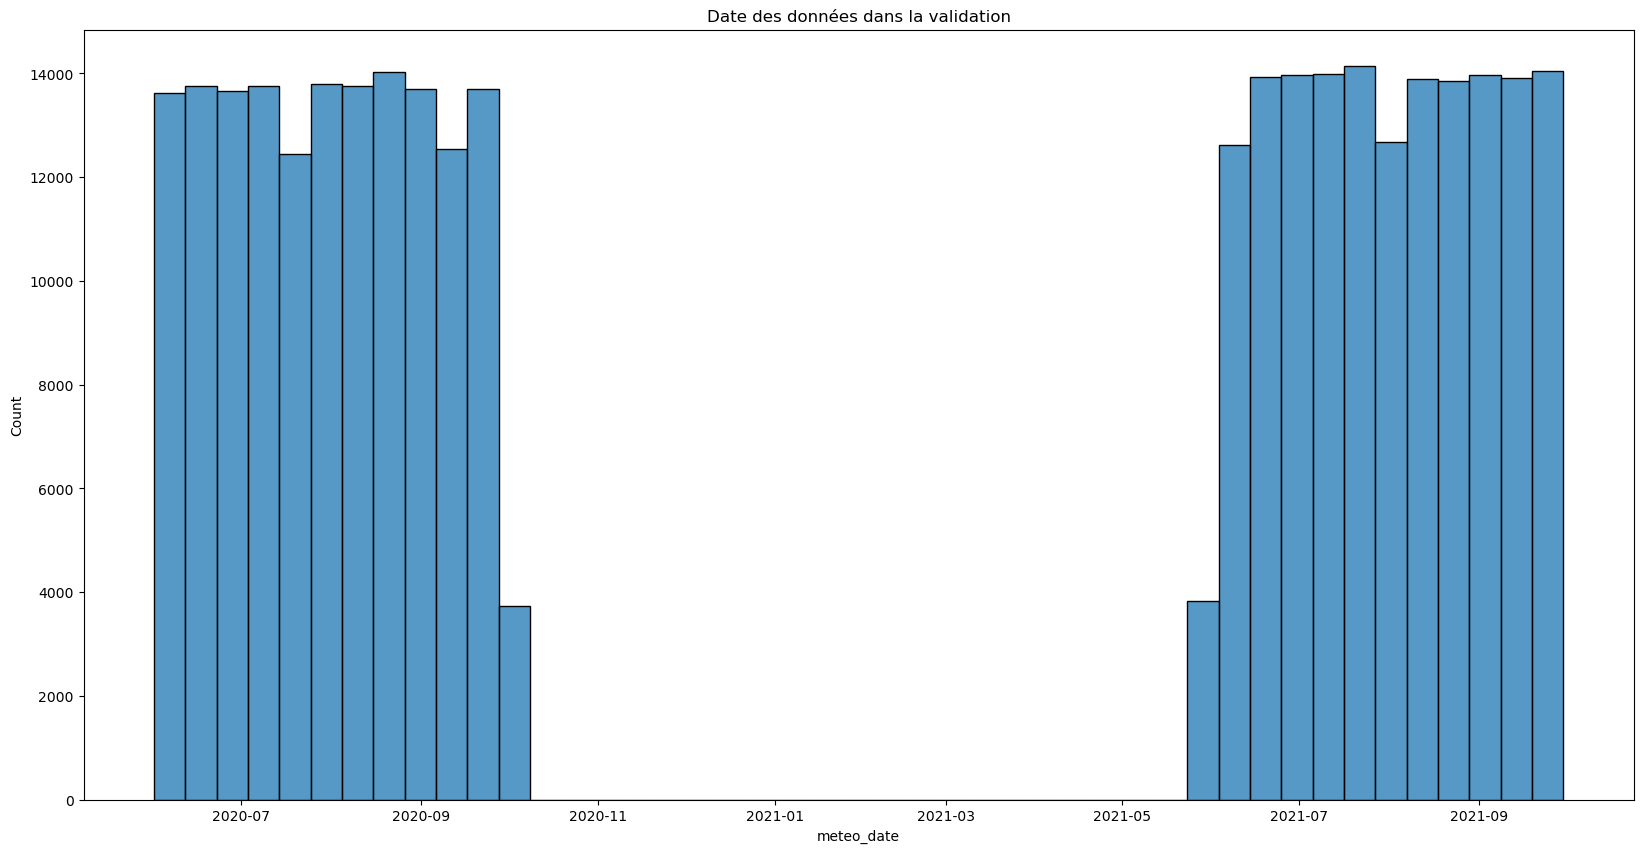

In [ ]:
plt.figure(figsize=(20, 10))
sns.histplot(pd.DataFrame(pd.to_datetime(X_val["meteo_date"], format="%Y-%m-%d"), columns=["meteo_date"]), x='meteo_date')
plt.title("Date des données dans la validation")
plt.show()

In [ ]:
# Apply the transformers selected
processing_pipeline = Pipeline(steps=[
    ("DropNaRate", DropNaRate(0.7)),
    ("MeteoTimeTnx", TimeTnx(delta=5, clean=False)),
    ("Prelevol", PrelevVol()),
    ("Prelevement", Prelev(columns=prelev_flo, usage_label_max_categories=4, mode_label_max_categories=4, scale=3)),
    ("CleanFeatures", CleanFeatures(cols_yael_input)),
    ("Altitude", AltitudeTrans(columns=["piezo_station_altitude", "meteo_altitude"])),
    ('LatLong',CleanLatLon()),
    ('CleanTemp',CleanTemp()),
    ('Temp',TemperaturePressionTrans(columns=cols_lucien_input)),
    ('CleanHydro', CleanHydro()),
    ('CleanPizo',  CleanPizo(pizo_cols)),
    ('Dates',DateTransformer()),
    ('DropCols',DropCols(columns_to_drop)),
    ('Keep_continuou', KeepCols(columns=continuous_var))
    # ... Add others transformations
])

In [ ]:
print("Pipeline ongoing...")
processed_X_train = processing_pipeline.fit_transform(X_train)
processed_X_val = processing_pipeline.transform(X_val)

Pipeline ongoing...
>> (Info) Droped columns : []
>> (Info - TimeTnx) fill na avec mean = 474.9644888624465 & 809.8013083514762
>> (INFO) missing values in columns ['prelev_volume_0', 'prelev_volume_1', 'prelev_volume_2', 'prelev_other_volume_sum'] are filled by the minimum of the column by commune
>> (Info - Prelev) 'prelev_usage_label_0' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_volume_obtention_mode_label_0' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_usage_label_1' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_volume_obtention_mode_label_1' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_usage_label_2' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_volume_obtention_mode_label_2' has been one-hot-encoded in 4 features
>> (Info) Calculating medians and means for ['insee_%_agri', 'meteo_rain_height', 'insee_pop_commune', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const']
>> (I

In [ ]:
processed_X_train.head()

,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,meteo_date,meteo_rain_height,meteo_time_tn,meteo_time_tx,meteo_temperature_avg,meteo__pressure_saturation_avg,hydro_observation_result_elab,prelev_volume_0,prelev_volume_1,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,hydro_observation_log
1886071,7.97,2.00,9.460277,42.933483,0.947060,0.0,195.000000,678.000000,9.400000,7.600,95.0,0.0,0.0,0.0,0.0,79.0,21080.0,0.0,0.0,4.553877
1287500,18.20,206.02,2.759903,47.072503,-0.827793,0.0,474.964489,809.801308,17.648367,11.525,805.0,374687.0,345092.0,4969747.0,28.6,452.0,22560.0,0.0,32.1,6.690842
1651820,12.90,215.66,3.358034,46.484443,0.305743,14.8,1175.000000,691.000000,17.600000,14.700,60980.0,172617227.0,2895385.0,16024055.0,0.5,1157.0,24180.0,15.1,6.0,11.018301
945651,11.90,126.00,1.151434,47.715761,0.978769,0.0,1030.000000,738.000000,9.000000,10.800,737.0,3031828.0,575407.0,11666582.0,25.0,228.0,25170.0,0.0,20.8,6.602588
2002277,61.00,534.59,1.794457,45.689541,0.452745,0.0,330.000000,825.000000,0.700000,5.440,7079.0,254327713.0,232873003.0,966976222.0,7.7,453.0,19590.0,3.8,3.8,8.864888


In [ ]:
print(processed_X_train.columns)

# Save the columns to a text file
columns = processed_X_train.columns
with open("processed_X_train_columns.txt", "w") as file:
    for col in columns:
        file.write(f"'{col}',\n")

In [ ]:
a

In [ ]:
# Check for missing values in each column
missing_values = processed_X_train.isna().sum()

# Filter and display columns with missing values
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)


Series([], dtype: int64)


In [ ]:
# Identify columns with missing values
missing_values = processed_X_train.isna().sum()
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

# Display rows where there are missing values in any of these columns
rows_with_missing = processed_X_train[processed_X_train[columns_with_missing.index].isna().any(axis=1)]
rows_with_missing.head()


Series([], dtype: int64)


,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,meteo_date,meteo_rain_height,meteo_time_tn,meteo_time_tx,meteo_temperature_avg,meteo__pressure_saturation_avg,hydro_observation_result_elab,prelev_volume_0,prelev_volume_1,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,hydro_observation_log


# Quick KNN

In [ ]:
#quick KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=25)  # Default is 5 neighbors
knn.fit(processed_X_train, y_train)

# Make predictions
y_val_pred = knn.predict(processed_X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


processed_X_train.head()

In [ ]:
continuous_variables = [
        "piezo_station_investigation_depth",
        "piezo_station_altitude",
        "piezo_station_longitude",
        "piezo_station_latitude",
        "meteo_date",
        "meteo_rain_height",
        "meteo_time_tn",
        "meteo_time_tx",
        "meteo_temperature_avg",
        "meteo__pressure_saturation_avg",
        "hydro_observation_result_elab",
        "prelev_volume_0",
        "prelev_volume_1",
        "prelev_volume_2",
        "prelev_other_volume_sum",
        "insee_%_agri",
        "insee_pop_commune",
        "insee_med_living_level",
        "insee_%_ind",
        "insee_%_const",
        "hydro_observation_log"
    ]

In [ ]:
#quick KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

global_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('StandardScaler', PartialStandardScaler(columns=continuous_variables)),
    ('estimator', RandomForestClassifier())
])

In [ ]:
global_pipeline.fit(X_train, y_train)

>> (Info) Droped columns : []
>> (Info - TimeTnx) fill na avec mean = 474.9644888624465 & 809.8013083514762
>> (INFO) missing values in columns ['prelev_volume_0', 'prelev_volume_1', 'prelev_volume_2', 'prelev_other_volume_sum'] are filled by the minimum of the column by commune
>> (Info - Prelev) 'prelev_usage_label_0' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_volume_obtention_mode_label_0' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_usage_label_1' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_volume_obtention_mode_label_1' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_usage_label_2' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_volume_obtention_mode_label_2' has been one-hot-encoded in 4 features
>> (Info) Calculating medians and means for ['insee_%_agri', 'meteo_rain_height', 'insee_pop_commune', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const']
>> (Info) Rainfall means 

In [ ]:
processed_X_train.isna().sum()

In [ ]:
y_val_pred = global_pipeline.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

>> (Info - TimeTnx) fill na avec mean = 461.0564433869446 & 813.3989164665467
>> (Info - Prelev) 'prelev_usage_label_0' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_volume_obtention_mode_label_0' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_usage_label_1' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_volume_obtention_mode_label_1' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_usage_label_2' has been one-hot-encoded in 4 features
>> (Info - Prelev) 'prelev_volume_obtention_mode_label_2' has been one-hot-encoded in 4 features
>> (Info) Filling missing values with calculated medians and means.
>> (Info) Transforming data: Filling missing values and applying one-hot encoding.
>> (Info) Missing values in piezo_station_investigation_depth filled with department means or global mean as fallback.
>> (Info) One-hot encoding applied to piezo_obtention_mode with missing values filled.
>> (Info) One-hot encoding appl

In [ ]:
rf = global_pipeline.named_steps['estimator']

rf.feature_importances_

array([0.00137847, 0.00882387, 0.01104706, 0.00254561, 0.00115589,
       0.00085449, 0.0026361 , 0.00184024, 0.00105851, 0.00082807,
       0.00156867, 0.00278554, 0.00078206, 0.00084149, 0.00281836,
       0.00182341, 0.00110474, 0.00089018, 0.00131834, 0.0032354 ,
       0.00068037, 0.00094635, 0.00327147, 0.00201043, 0.00120565,
       0.00092227, 0.00136414, 0.00192355, 0.00196224, 0.00208613,
       0.00039156, 0.0008352 , 0.00316239, 0.00341831, 0.0002796 ,
       0.00160699, 0.00028404, 0.00061166, 0.00085623, 0.00568765,
       0.00066621, 0.00124899, 0.00586162, 0.00036246, 0.04023162,
       0.03442216, 0.03402194, 0.03303055, 0.10634535, 0.02783645,
       0.03905944, 0.03633979, 0.05731417, 0.05304711, 0.09709049,
       0.03333748, 0.03341688, 0.03416157, 0.03733607, 0.02294283,
       0.02484454, 0.02477552, 0.02022897, 0.02199428, 0.09724077])

In [ ]:
dictionnaire = dict(zip(processed_X_train, rf.feature_importances_))
# Trier le dictionnaire par valeur
dictionnaire_trie = dict(sorted(dictionnaire.items(), key=lambda item: item[1], reverse=True))
dictionnaire_trie

{'hydro_hydro_quantity_elab_infrequent_sklearn': 0.10634534961006964,
 'piezo_measure_nature_code_S': 0.09724077001178016,
 'piezo_status_Donnée contrôlée niveau 2': 0.0970904865876622,
 'piezo_status_Donnée brute': 0.05731417306161456,
 'piezo_status_Donnée contrôlée niveau 1': 0.05304711330967523,
 'prelev_volume_obtention_mode_label_2_Volume mesuré': 0.04023161636585962,
 'piezo_obtention_mode_Valeur mesurée': 0.039059439900773846,
 'piezo_qualification_Incorrecte': 0.03733607036958457,
 'piezo_obtention_mode_Valeur reconstituée': 0.03633978929970393,
 'prelev_volume_obtention_mode_label_2_nan': 0.034422162461814315,
 'piezo_qualification_Incertaine': 0.03416157120946426,
 'prelev_volume_obtention_mode_label_2_infrequent_sklearn': 0.03402193911259831,
 'piezo_qualification_Correcte': 0.03341687918465353,
 'piezo_status_Donnée interprétée': 0.03333747901665421,
 'hydro_observation_log': 0.03303055140708709,
 "piezo_obtention_mode_Mode d'obtention inconnu": 0.027836446756309637,
 'pie

### Save Pipeline

In [ ]:
save = False
if save:
        
    pipeline_name = "pipeline_randomforest_1st"

    # Writing to sample.json
    with open(out_folder_config / Path(pipeline_name + ".pkl"), "wb") as file:
        pickle.dump(global_pipeline, file)